# Homework 2

Write a program to generate:
(a) a binary image (threshold at 128)
(b) a histogram
(c) connected components(regions with + at centroid, bounding box)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[0], img.shape[1]

In [2]:
#generate a binary image (threshold at 128)
def Binarize():
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            if img[i][j] < 128:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [3]:
#histogram
def histogram():
    hist = np.zeros(256)   
    for i in range(h):
        for j in range(w):
            hist[img[i][j]] += 1
    plt.plot(hist)
    plt.show()

In [4]:
#connected components
def ConnectedComponents(img):
    labels = np.zeros([h, w], dtype=int)
    label = 0

    #initialization of each pixel to a unique label
    for i in range(h):
        for j in range(w):
            if img[i][j] == 255:
                label += 1
                labels[i][j] = label
    #iteration of top-down followed by bottom-up passes until no change
    change = 1
    while change == 1:
        change = 0
        for i in range(h):
            for j in range(w):
                if labels[i][j] != 0:
                    if i>0 and labels[i-1][j] != 0:
                        if labels[i-1][j] < labels[i][j]:
                            labels[i][j] = labels[i-1][j]
                            change = 1
                    if i<h-1 and labels[i+1][j] != 0:
                        if labels[i+1][j] < labels[i][j]:
                            labels[i][j] = labels[i+1][j]
                            change = 1
                    if j>0 and labels[i][j-1] != 0:
                        if labels[i][j-1] < labels[i][j]:
                            labels[i][j] = labels[i][j-1]
                            change = 1
                    if j<w-1 and labels[i][j+1] != 0:
                        if labels[i][j+1] < labels[i][j]:
                            labels[i][j] = labels[i][j+1]
                            change = 1
        for i in range(h-1, -1, -1):
            for j in range(w-1, -1, -1):
                if labels[i][j] != 0:
                    if i>0 and labels[i-1][j] != 0:
                        if labels[i-1][j] < labels[i][j]:
                            labels[i][j] = labels[i-1][j]
                            change = 1
                    if i<h-1 and labels[i+1][j] != 0:
                        if labels[i+1][j] < labels[i][j]:
                            labels[i][j] = labels[i+1][j]
                            change = 1
                    if j>0 and labels[i][j-1] != 0:
                        if labels[i][j-1] < labels[i][j]:
                            labels[i][j] = labels[i][j-1]
                            change = 1
                    if j<w-1 and labels[i][j+1] != 0:
                        if labels[i][j+1] < labels[i][j]:
                            labels[i][j] = labels[i][j+1]
                            change = 1
                            
    #bounding box
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    list = []
    for i in range(h):
        for j in range(w):
            if labels[i][j] != 0 and labels[i][j] not in list:
                area = np.sum(labels == labels[i][j])
                list.append(labels[i][j])

                #get rectangle
                if area > 500:
                    min_x = min_y = 99999
                    max_x = max_y = -1
                    sum_x = sum_y = count = 0
                    for x in range(h):
                        for y in range(w):
                            if labels[x][y] == labels[i][j]:
                                sum_x += x
                                sum_y += y
                                count += 1
                                if x < min_x:
                                    min_x = x
                                if y < min_y:
                                    min_y = y
                                if x > max_x:
                                    max_x = x
                                if y > max_y:
                                    max_y = y
                    cv2.rectangle(img, (min_y, min_x), (max_y, max_x), (255, 255, 0), 2)
                    sum_x /= count
                    sum_y /= count
                    sum_x = int(sum_x)
                    sum_y = int(sum_y)
                    cv2.line(img, (sum_y-10, sum_x), (sum_y+10, sum_x), (0, 0, 255), 2)
                    cv2.line(img, (sum_y, sum_x-10), (sum_y, sum_x+10), (0, 0, 255), 2)
    return img

In [5]:
#顯示影像
def show_result(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

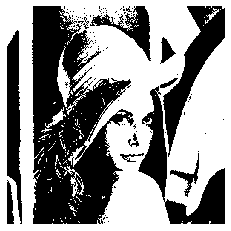

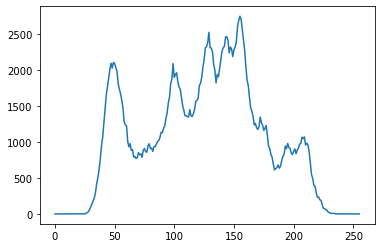

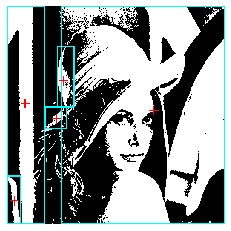

In [6]:
binary_img = Binarize()
show_result(Binarize())
histogram()
show_result(ConnectedComponents(binary_img))